# Descenso del Gradiente

El descenso del gradiente, es un algoritmo interactivo de optimización para buscar un mínimo local de una función diferenciable.

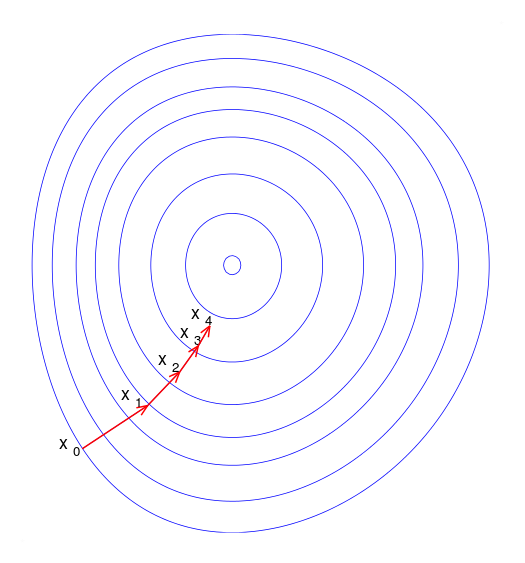

Como ejemplo, la función con la que se trabajará será:

$$F\left( x,y \right) = \ \sin\left( \frac{1}{2}x^{2} - \frac{1}{4}y^{2} + 3 \right)\cos\left( 2x + 1 - e^{y} \right)$$

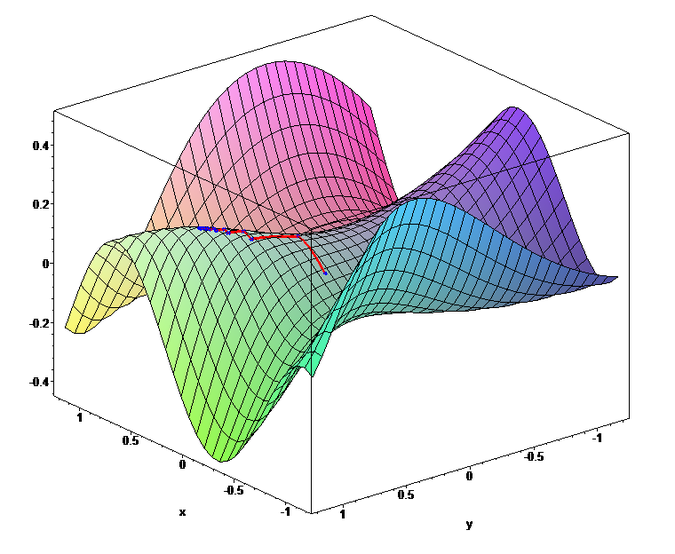

Ratio de aprendizaje (learning ratio):
http://www.benfrederickson.com/numerical-optimization/

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

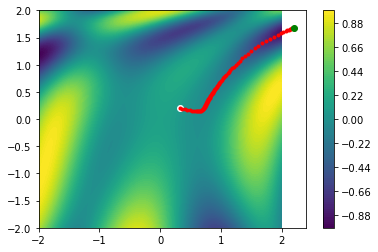

In [9]:
#creación de función anónima, th: vector de parámetros. th[0] = x, th[1] = y

func = lambda th: np.sin(1/2 * th[0] ** 2 -1/4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

#Generación 100 valores entre -2 y 2.
res = 100
_X = np.linspace(-2,2,res)
_Y = np.linspace(-2,2,res)

#Matriz Z de tamaño res x res, 100x100, inicializada en 0, para almazenar futuros valores.
_Z = np.zeros((res,res))

#Función enumerate: devuelve el indice y el valor al recorrer el vector
#el índice es ix,iy son ínice y los valores son x e y.

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy,ix] = func([x,y])

#Grafico de Superfície tridimensional vista de pájaro:

plt.contourf(_X,_Y,_Z,100)
plt.colorbar()


#generación de 2 valores aleatorios sobre la superficie:
#esta función genera valores de rango [0,1], pero hemos definido la visualización de -2 a 2,por lo que hay que transformar los valores

Theta = np.random.rand(2) * 4 -2

#Calcular derivadas parciales para calcular la pendiente de la función en dicho punto, que es usará para ir descendiendo
#Cálculo de las derivadas a partir de pequeñas variaciones

_T = np.copy(Theta)

h=0.001

#Ratio de aprendizaje, lr:
lr = 0.001

plt.plot(Theta[0],Theta[1], "o", c="white")


grad = np.zeros(2)

for _ in range(10000):

    for it,th in enumerate(Theta):
        
        _T = np.copy(Theta)
        _T[it] = _T[it] + h

        deriv = (func(_T) - func(Theta)) / h
        grad[it] = deriv
    
    Theta = Theta -lr * grad
        
    if(_ % 100 ==0):
        plt.plot(Theta[0],Theta[1],".", c="red")


plt.plot(Theta[0],Theta[1], "o", c="green")
plt.show()